# Proyecto Integrador (TC5035)
# Identificación de Gestos en el Lenguaje de Manos Mexicano
---
## EQUIPO 51
- CARLOS MIGUEL ARVIZU DURÁN - A01410682
- YOHANNA CEBALLOS SALOMÓN - A01795115
- RUBÉN DÍAZ GARCÍA - A01371849

## Claustro de profesores
- PROFESOR ASESOR: DR. RAÚL VALENTE RAMÍREZ VELARDE
- PROFESORA TITULAR: DRA. GRETTEL BARCELÓ ALONSO
- PROFESOR TITULAR: DR. LUIS EDUARDO FALCÓN MORALES
- PROFESORA ASISTENTE: MTRA. VERÓNICA SANDRA GUZMÁN DE VALLE



# Descripción del conjunto de datos
## ¿Qué es la Lengua de Señas Americana?

La Lengua de Señas Americana (ASL) es una lengua completa y natural que posee las mismas propiedades lingüísticas que las lenguas orales, con una gramática que difiere del inglés. El ASL se expresa mediante movimientos de las manos y del rostro. Es la lengua principal de muchas personas sordas y con discapacidad auditiva en Norteamérica, y también es utilizada por algunas personas oyentes. (American sign language, 2021)

## WLASL dataset:

WLASL constituye el conjunto de datos en video más amplio para el reconocimiento de la Lengua de Señas Americana (ASL) a nivel léxico, al incorporar 2,000 vocablos de uso frecuente en dicha lengua. Se prevé que este recurso contribuya de manera significativa al avance de la investigación en la comprensión del lenguaje de señas y, en última instancia, favorezca la comunicación entre las comunidades sordas y oyentes. (WLASL, 2020)

## Estructura del conjunto de datos WLASL

El conjunto de datos WLASL está diseñado para el reconocimiento de señas a nivel de palabra en la Lengua de Señas Americana (ASL). Su organización facilita el acceso tanto a los videos como a la información asociada a cada seña. La estructura general es la siguiente:

1. Archivos principales

Videos:
Cada seña está representada en archivos de video, nombrados con un identificador único (video_id.mp4). Estos videos muestran a diferentes signantes ejecutando la seña correspondiente.

Metadatos (JSON/CSV):
El dataset incluye un archivo de anotaciones (generalmente en formato JSON) que contiene la información estructurada de cada instancia.
Ejemplo de campos:

gloss: la palabra o etiqueta asociada a la seña (ejemplo: book, eat, friend).

video_id: identificador único del video.

signer_id: identificador del participante que ejecuta la seña.

split: partición a la que pertenece el video (train, val, test).

bbox (en algunos casos): coordenadas de la caja delimitadora de la mano o del cuerpo.

2. Número de clases

El corpus contiene aproximadamente 2,000 clases léxicas distintas, correspondientes a palabras comunes en ASL. Cada clase puede estar representada por varios videos de distintos signantes, lo que aporta variabilidad en la ejecución de las señas.

3. Distribución de datos

Los videos están divididos en subconjuntos para entrenamiento, validación y prueba, con el fin de estandarizar las evaluaciones entre modelos de reconocimiento.

Train: mayor proporción de instancias, destinada al aprendizaje del modelo.

Validation: utilizado para ajustar parámetros y prevenir sobreajuste.

Test: reservado para medir el desempeño final en condiciones controladas.

4. Características técnicas de los videos

Formato: MP4.

Resolución: variable, generalmente baja-media para optimizar el almacenamiento.

Duración: corta, equivalente al tiempo necesario para ejecutar una seña.

FPS (frames por segundo): entre 25 y 30, dependiendo del video original.

5. Nivel de anotación

Las anotaciones están realizadas a nivel de palabra (word-level). Esto significa que cada video está etiquetado con un único gloss que corresponde a la palabra que representa la seña. No se incluye segmentación a nivel de fonemas manuales (como movimientos específicos de la mano), lo que lo distingue de datasets fonológicos más detallados.

## Bibliografía
- American sign language. (2021, October 29). NIDCD. https://www.nidcd.nih.gov/health/american-sign-language
- WLASL (2020). WLASL. https://dxli94.github.io/WLASL/


## Importaciones

In [1]:
import os
import cv2
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

## Carga de datos
Sustituir el path por el path del dataset

In [2]:
# Cargar JSON con los metadatos
dataset_path = "/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/WLASL/archive/WLASL_v0.3.json"
with open(dataset_path, "r") as f:
    data = json.load(f)
# Lectura del glosario
rows = []
for entry in data:
    gloss = entry["gloss"]
    for inst in entry["instances"]:
        rows.append({
            "gloss": gloss,
            "video_id": inst["video_id"],
            "signer_id": inst["signer_id"],
            "source": inst["source"],
            "split": inst["split"],
            "url": inst["url"],
            "fps": inst["fps"],
            "frame_start": inst["frame_start"],
            "frame_end": inst["frame_end"],
            "bbox": inst["bbox"],
            "variation_id": inst["variation_id"]
        })

df_raw = pd.DataFrame(rows)
df_raw.head(10)

,gloss,video_id,signer_id,source,split,url,fps,frame_start,frame_end,bbox,variation_id
0,book,69241,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,25,1,-1,"[385, 37, 885, 720]",0
1,book,65225,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,25,1,-1,"[190, 25, 489, 370]",0
2,book,68011,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,25,1,-1,"[262, 1, 652, 480]",0
3,book,68208,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,25,1,60,"[123, 19, 516, 358]",0
4,book,68012,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,25,1,-1,"[95, 0, 1180, 720]",0
5,book,70212,121,northtexas,val,https://www.youtube.com/watch?v=hjS0dQDgbjo,25,2150,2249,"[110, 25, 274, 240]",0
6,book,70266,121,northtexas,train,https://www.youtube.com/watch?v=WGfiiDgrq1I,25,3732,3852,"[153, 38, 395, 360]",0
7,book,07085,49,aslpro,train,http://www.aslpro.com/main/b/book_english_gram...,25,1,-1,"[16, 2, 235, 240]",0
8,book,07086,49,aslpro,train,http://www.aslpro.com/main/b/book_geography.swf,25,1,-1,"[16, 4, 239, 240]",0
9,book,07087,18,aslpro,train,http://www.aslpro.com/main/b/book_geometry.swf,25,1,-1,"[8, 1, 253, 240]",0


In [3]:
df_raw.iloc[34:45]

,gloss,video_id,signer_id,source,split,url,fps,frame_start,frame_end,bbox,variation_id
34,book,07079,49,aslpro,train,http://www.aslpro.com/main/b/book_anatomy.swf,25,1,-1,"[15, 2, 238, 240]",0
35,book,07080,18,aslpro,train,http://www.aslpro.com/main/b/book_art_history.swf,25,1,-1,"[28, 2, 226, 240]",0
36,book,07081,18,aslpro,train,http://www.aslpro.com/main/b/book_art.swf,25,1,-1,"[23, 2, 226, 240]",0
37,book,07082,18,aslpro,train,http://www.aslpro.com/main/b/book_business.swf,25,1,-1,"[30, 3, 228, 240]",0
38,book,07083,18,aslpro,val,http://www.aslpro.com/main/b/book_chemistry.swf,25,1,-1,"[0, 3, 260, 240]",0
39,book,07084,18,aslpro,train,http://www.aslpro.com/main/b/book_coloring.swf,25,1,-1,"[29, 4, 225, 240]",0
40,drink,69302,115,aslbrick,val,http://aslbricks.org/New/ASL-Videos/drink.mp4,25,1,-1,"[551, 68, 1350, 1080]",0
41,drink,65539,94,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,25,1,-1,"[153, 11, 488, 370]",0
42,drink,70173,121,northtexas,val,https://www.youtube.com/watch?v=F5Wef1_PtLk,25,5710,5831,"[142, 20, 501, 480]",0
43,drink,68538,113,lillybauer,val,https://www.youtube.com/watch?v=HZMTQJdBZ9g,25,1,71,"[112, 13, 529, 356]",0


In [4]:
def find_missing_videos(df, base_path="WLASL/archive/videos", ext=".mp4"):
    # ID's esperados del archivo de metadata Json
    expected_ids = set(df["video_id"].astype(str).unique())
    
    # Archivos en el folder local con la extensión correcta
    local_files = [f for f in os.listdir(base_path) if f.endswith(ext)]
    local_ids = set(os.path.splitext(f)[0] for f in local_files)

    # Diferencias y extras(videos no identificados en la metadata pero sí presentes)
    missing = sorted(expected_ids - local_ids)
    extra = sorted(local_ids - expected_ids)
    
    print(f"Videos esperados: {len(expected_ids)}")
    print(f"Videos encontrados: {len(local_ids)}")
    print(f"Videos faltantes: {len(missing)}")
    print(f"Videos extra: {len(extra)}")
    
    return missing, extra


In [5]:
missing, extra = find_missing_videos(df_raw)
print("First 10 missing IDs:", missing[:10])


Videos esperados: 21083
Videos encontrados: 11980
Videos faltantes: 9103
Videos extra: 0
First 10 missing IDs: ['00295', '00333', '00337', '00340', '00374', '00378', '00383', '00412', '00419', '00422']


In [6]:
# Función para dividir el conjunto de datos entre los faltantes y los presentes.
# el conjunto de videos no está completo debido a enlaces rotos por lo que 
# los metadatos tienen más información de la que se encuentra en el dataset
# esta función busca los faltantes y los separa en 2 dataframes.
def split_by_missing(df, missing):
    missing = [str(x) for x in missing]
    missing_df = df[df["video_id"].astype(str).isin(missing)]
    not_missing_df = df[~df["video_id"].astype(str).isin(missing)]
    
    return missing_df, not_missing_df

In [7]:
# Separación de dataframes (datos faltantes)
missing_df, df = split_by_missing(df_raw, missing)

print("Datos faltantes:", len(missing_df))
print("Datos:", len(df))

display(missing_df.head())
display(df.head())

Datos faltantes: 9103
Datos: 11980


,gloss,video_id,signer_id,source,split,url,fps,frame_start,frame_end,bbox,variation_id
1,book,65225,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,25,1,-1,"[190, 25, 489, 370]",0
2,book,68011,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,25,1,-1,"[262, 1, 652, 480]",0
3,book,68208,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,25,1,60,"[123, 19, 516, 358]",0
4,book,68012,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,25,1,-1,"[95, 0, 1180, 720]",0
5,book,70212,121,northtexas,val,https://www.youtube.com/watch?v=hjS0dQDgbjo,25,2150,2249,"[110, 25, 274, 240]",0


,gloss,video_id,signer_id,source,split,url,fps,frame_start,frame_end,bbox,variation_id
0,book,69241,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,25,1,-1,"[385, 37, 885, 720]",0
10,book,07069,31,signschool,train,https://signstock.blob.core.windows.net/signsc...,25,1,-1,"[462, 44, 949, 720]",0
17,book,07068,36,startasl,train,https://s3-us-west-1.amazonaws.com/files.start...,25,1,-1,"[234, 17, 524, 414]",0
22,book,07070,59,asldeafined,train,https://media.asldeafined.com/vocabulary/14666...,25,1,-1,"[131, 26, 526, 480]",0
24,book,07099,12,aslsearch,val,http://www.aslsearch.com/signs/videos/book.mp4,25,1,-1,"[162, 54, 528, 400]",0


# EDA

In [8]:
# Datos nulos y tipos de datos
print("Información General:")
df.info()

# Shape of the DataFrame (rows, columns)
print("\nShape:")
print(df.shape)

Información General:
<class 'pandas.core.frame.DataFrame'>
Index: 11980 entries, 0 to 21082
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gloss         11980 non-null  object
 1   video_id      11980 non-null  object
 2   signer_id     11980 non-null  int64 
 3   source        11980 non-null  object
 4   split         11980 non-null  object
 5   url           11980 non-null  object
 6   fps           11980 non-null  int64 
 7   frame_start   11980 non-null  int64 
 8   frame_end     11980 non-null  int64 
 9   bbox          11980 non-null  object
 10  variation_id  11980 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.1+ MB

Shape:
(11980, 11)


In [9]:
# Resumen de estadísticas para columnas numéricas
df.describe()

,signer_id,fps,frame_start,frame_end,variation_id
count,11980.000000,11980.0,11980.000000,11980.0,11980.000000
mean,27.990150,25.0,1.000250,-1.0,0.054841
std,28.920946,0.0,0.020429,0.0,0.232398
min,0.000000,25.0,1.000000,-1.0,0.000000
25%,11.000000,25.0,1.000000,-1.0,0.000000
50%,13.000000,25.0,1.000000,-1.0,0.000000
75%,38.000000,25.0,1.000000,-1.0,0.000000
max,120.000000,25.0,3.000000,-1.0,2.000000


In [10]:
# Valores únicos de las clases (gloss) 
print("Palabras únicas:", df['gloss'].nunique())
# Total de videos disponibles
print("Total de instancias de video:", len(df))
# Valores de cada subconjunto de datos train, test, val
print(df['split'].value_counts())

Palabras únicas: 2000
Total de instancias de video: 11980
split
train    8313
val      2253
test     1414
Name: count, dtype: int64


<Axes: title={'center': 'Top 20 palabras por número de videos disponibles'}, xlabel='gloss'>

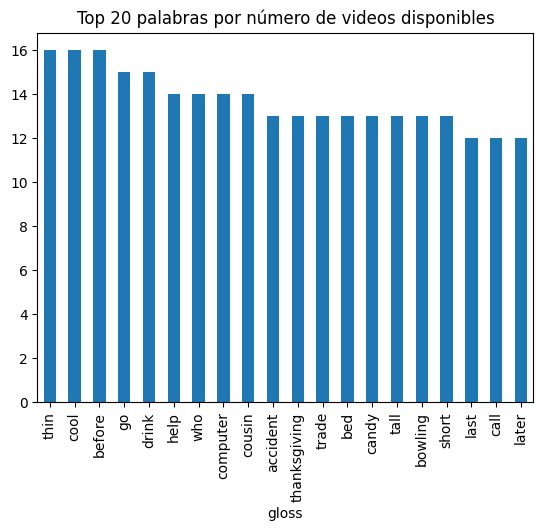

In [11]:
instances_per_gloss = df.groupby("gloss")["video_id"].count().sort_values(ascending=False)
instances_per_gloss.head(20).plot(kind="bar", title="Top 20 palabras por número de videos disponibles")

<Axes: title={'center': 'Bottom 20 palabras por número de videos'}, xlabel='gloss'>

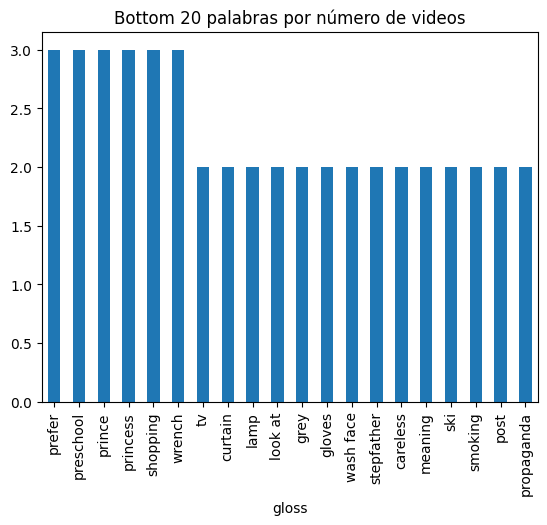

In [12]:
instances_per_gloss.tail(20).plot(kind="bar", title="Bottom 20 palabras por número de videos")

In [13]:
# Count how many rows per gloss
gloss_counts = df["gloss"].value_counts()

# Filter glosses with more than 15 rows
count_glosses = gloss_counts[gloss_counts > 15]

# How many such glosses exist
print("Número de palabras con > 15 videos:", len(count_glosses))

print(count_glosses)

Número de palabras con > 15 videos: 3
gloss
thin      16
before    16
cool      16
Name: count, dtype: int64


In [14]:
# Count how many rows per gloss
gloss_counts = df["gloss"].value_counts()

# Filter glosses with less than 5 rows
low_count_glosses = gloss_counts[gloss_counts < 5]

# How many such glosses exist
print("Número de palabras con < 5 videos:", len(low_count_glosses))

print(low_count_glosses)

Número de palabras con < 5 videos: 425
gloss
v                 4
valley            4
vice president    4
vlog              4
w                 4
                 ..
look at           2
curtain           2
wash face         2
ski               2
smoking           2
Name: count, Length: 425, dtype: int64


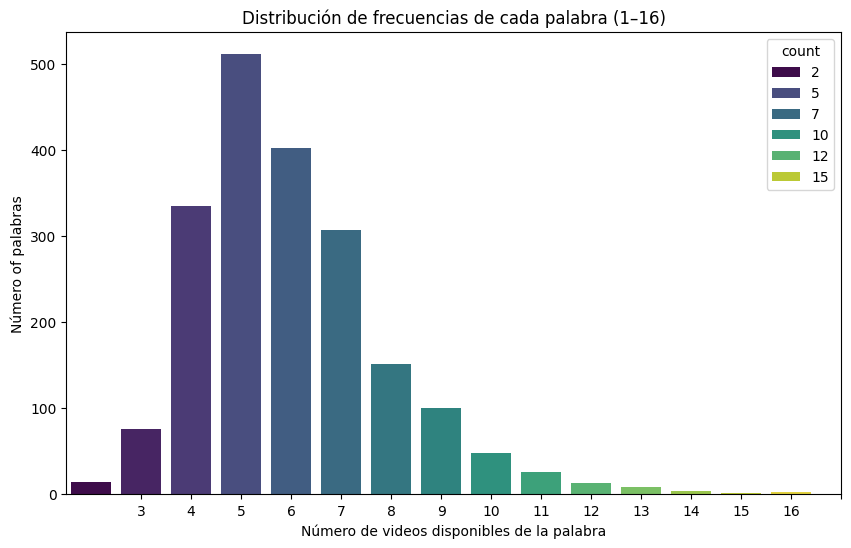

In [15]:
import matplotlib.pyplot as plt

# Count how many times each gloss appears
gloss_counts = df["gloss"].value_counts()

# Build frequency distribution: how many glosses appear 1, 2, ..., 25 times
freq_distribution = gloss_counts.value_counts().sort_index()
freq_distribution = freq_distribution[freq_distribution.index <= 25]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_distribution.index, y=freq_distribution.values, hue=freq_distribution.index, palette='viridis')
plt.xlabel("Número de videos disponibles de la palabra")
plt.ylabel("Número of palabras")
plt.title("Distribución de frecuencias de cada palabra (1–16)")
plt.xticks(range(1, 16))
plt.show()


In [16]:
# Cuenta de cuantas veces aparece cada palabra
gloss_counts = df["gloss"].value_counts()

freq_distribution = gloss_counts.value_counts().sort_index()
freq_distribution = freq_distribution[freq_distribution.index <= 25]

freq_table = pd.DataFrame({
    "Cantidad de videos": freq_distribution.index,
    "Número de clases": freq_distribution.values
})

freq_table

,Cantidad de videos,Número de clases
0,2,14
1,3,76
2,4,335
3,5,511
4,6,402
5,7,307
6,8,151
7,9,100
8,10,48
9,11,26


In [17]:
# Funciones para lectura de metadatos de los videos del dataset
# Se obtienen parámetros extra como la cantidad de frames, 
# la duración del video y su tamaño.

def video_info_opencv(path: Path):
    cap = cv2.VideoCapture(str(path))
    if not cap.isOpened():
        return {"file": str(path), "ok": False}

    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frames / fps if fps > 0 else None
    size_bytes = os.path.getsize(path)
    cap.release()

    return {
        "file": str(path),
        "filename": path.name,
        "size_mb": round(size_bytes/(1024*1024), 3),
        "frames": frames,
        "fps": fps,
        "duration_sec": duration,
        "width": width,
        "height": height,
        "aspect_ratio": f"{width}:{height}" if height else None,
        "ok": True
    }

def scan_folder(folder, exts=(".mp4",".avi",".mov",".mkv",".webm")):
    rows = []
    for f in Path(folder).rglob("*"):
        if f.suffix.lower() in exts:
            rows.append(video_info_opencv(f))
    return pd.DataFrame(rows)

In [18]:
df = scan_folder("/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/WLASL/archive/videos")
df["video_id"] = df["filename"].str.replace(".mp4", "", regex=False)
df = df[["video_id"] + ["size_mb"] + ["frames"] + ["fps"] + ["duration_sec"] + ["width"] + ["height"] + ["aspect_ratio"] + ["ok"] + ["filename"] + ["file"]]
df

,video_id,size_mb,frames,fps,duration_sec,width,height,aspect_ratio,ok,filename,file
0,00335,0.079,58,25.000000,2.320000,320,240,320:240,True,00335.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
1,00336,0.459,65,30.004616,2.166333,640,480,640:480,True,00336.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
2,00338,0.069,72,29.970000,2.402402,288,192,288:192,True,00338.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
3,00339,0.058,61,29.970000,2.035369,288,192,288:192,True,00339.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
4,00341,0.848,84,30.331450,2.769403,720,400,720:400,True,00341.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
...,...,...,...,...,...,...,...,...,...,...,...
11975,69542,3.670,76,29.970030,2.535867,1280,720,1280:720,True,69542.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
11976,69544,3.025,83,29.970030,2.769433,1280,720,1280:720,True,69544.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
11977,69545,2.621,65,29.970030,2.168833,1280,720,1280:720,True,69545.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...
11978,69546,2.893,72,29.970030,2.402400,1280,720,1280:720,True,69546.mp4,/mnt/c/Users/Raven/Desktop/ProyectoIntegrador/...


In [19]:
df.describe()

,size_mb,frames,fps,duration_sec,width,height
count,11980.000000,11980.000000,11980.000000,11980.000000,11980.000000,11980.000000
mean,0.428724,69.122955,28.530535,2.428481,759.697830,459.762604
std,0.540435,26.640414,3.101907,0.932876,544.235755,292.665907
min,0.013000,15.000000,12.000000,0.625622,288.000000,180.000000
25%,0.076000,46.000000,25.000000,1.668333,320.000000,240.000000
50%,0.367500,70.000000,29.970000,2.466333,640.000000,400.000000
75%,0.634000,87.000000,30.000000,3.002970,720.000000,480.000000
max,7.344000,233.000000,59.940000,8.125000,1920.000000,1080.000000


In [20]:
def plot_eda_distributions(df):
    cols = ["size_mb", "frames", "fps", "duration_sec", "width", "height"]
    
    for col in cols:
        plt.figure(figsize=(8, 5))

        # Histograma
        plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.grid(axis='y', linestyle="--", alpha=0.6)
        plt.show()

        # Boxplot para ver outliers
        plt.figure(figsize=(6, 3))
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title(f"Boxplot de {col}")
        plt.xlabel(col)
        plt.show()


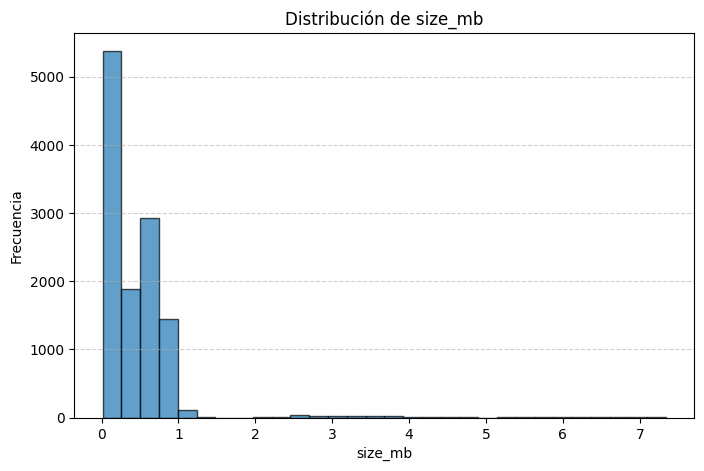

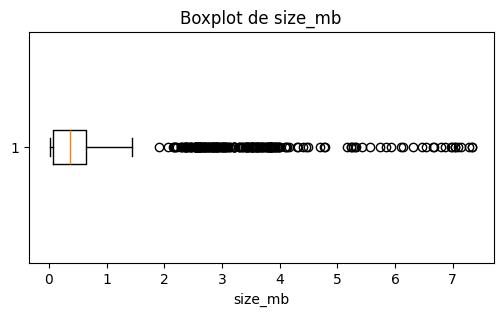

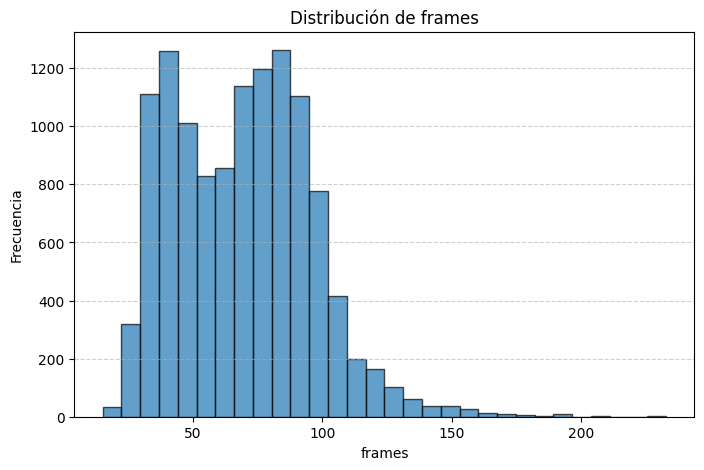

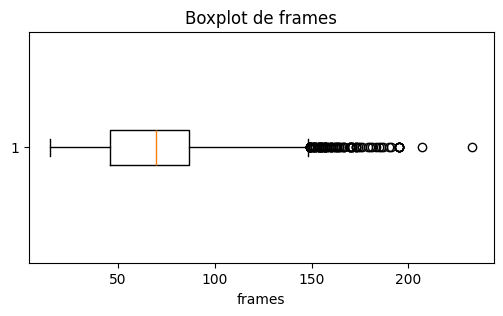

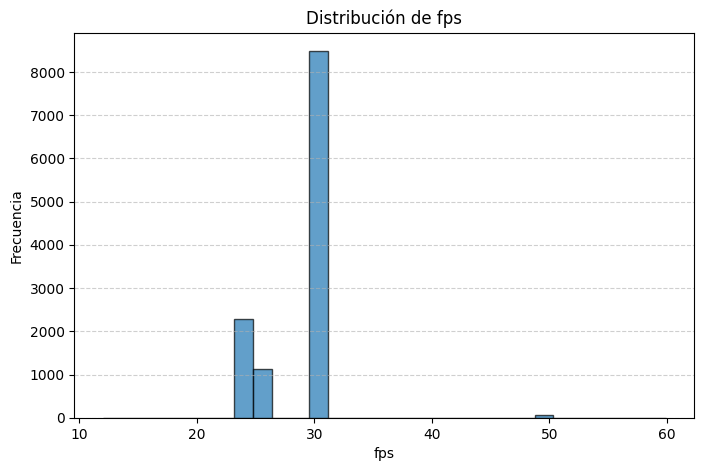

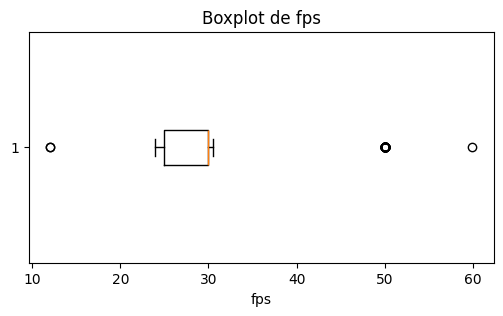

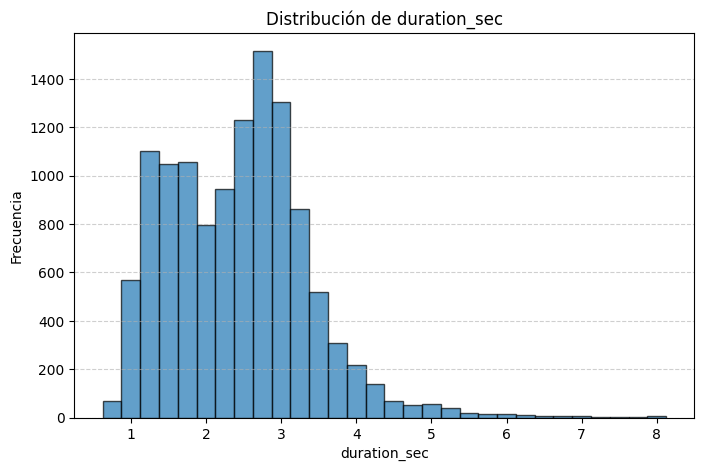

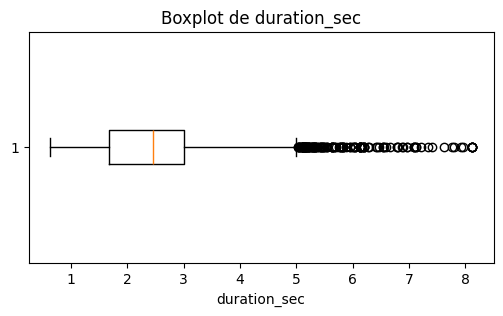

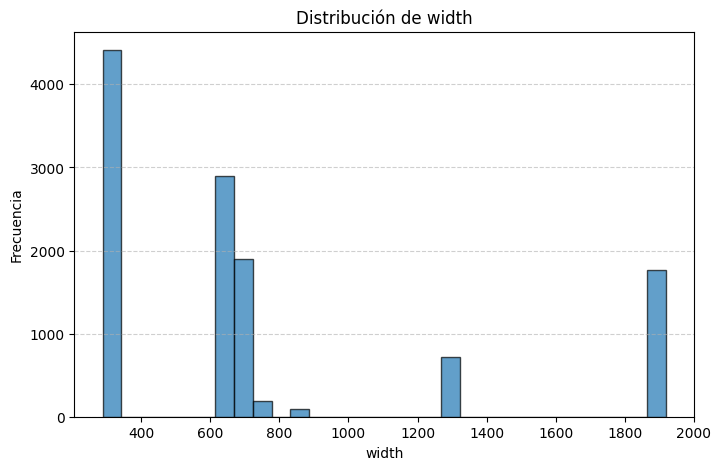

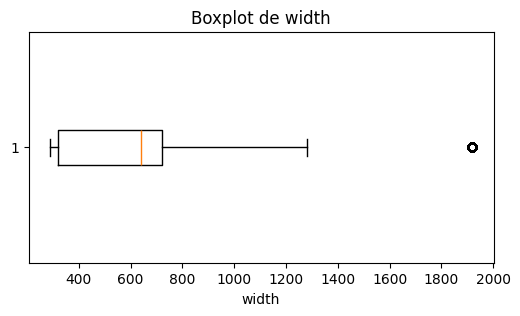

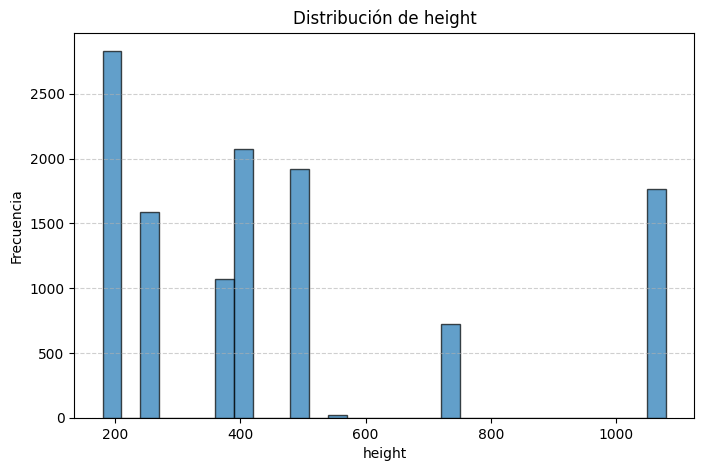

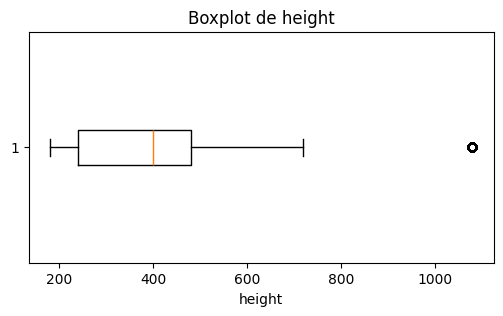

In [21]:
plot_eda_distributions(df)

# Análisis:

1. ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 

Sí, se identifica que debido a los links rotos y el hecho de que el dataset se ensambló de varias fuentes, hay 9103 valores faltantes lo cual representa arriba del 40% del dataset original. No se detectan patrones de ausencia.

2. ¿Hay valores atípicos en el conjunto de datos?

Hay algunos videos muy largos, con pesos atípicos o con resoluciones grandes como se puede ver en las gráficas, se espera que no afecte el desempeño del modelo aunque se prevee que afectará en tiempos de entrenamiento.

3. ¿Cuál es la cardinalidad de las variables categóricas?

La variable categórica por excelencia para este conjunto es gloss y su cardinalidad es de 2000 valores. (signer_id no es de relevancia)

4. ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

No para el uso que le daremos.

5. ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

Sólo las duraciones de los videos para las palabras que son más largas de ejecutar en señas, pero siguen dentro del rango de valores.

7. ¿Se deberían normalizar las imágenes para visualizarlas mejor?

Se plantea dejar los videos sin hacer una edición ya que todos se aprecian de buena manera, se propone realizar normalizaciones y ajustar los videos una vez terminando el entrenamiento del modelo para casos reales y probar su eficacia.

8. ¿Hay desequilibrio en las clases de la variable objetivo?

Sí, muy probablemente causado por los datos faltantes del conjunto, se detectan 425 clases que tienen de 2 a 4 videos únicamente.

# Transfer Learning entre WLASL y LSM

El conjunto de datos WLASL (Word-Level American Sign Language) constituye la base de datos en video más grande disponible para el reconocimiento de señas a nivel léxico en ASL, con alrededor de 2,000 señas. Su amplitud y diversidad lo convierten en un recurso valioso para el preentrenamiento de modelos de aprendizaje profundo, que posteriormente pueden ser ajustados (fine-tuned) para tareas en Lengua de Señas Mexicana (LSM).

Aunque la investigación lingüística ha demostrado que ASL y LSM son lenguas distintas, con gramáticas y estructuras propias, existe evidencia de similitud en el léxico. Faurot, Dellinger, Eatough y Parkhurst (1999) realizaron una comparación de 100 señas entre ASL y LSM, encontrando que un 23% eran idénticas o similares. Sin embargo, también identificaron un 17% de falsos cognados, es decir, señas formalmente iguales, pero con significados diferentes.

Este hallazgo es crucial desde la perspectiva de la inteligencia artificial:
- Las señas idénticas o altamente similares pueden ser reutilizadas directamente como características visuales transferibles entre ambos idiomas.
- Los falsos cognados no deben descartarse, pues su forma visual es la misma; aunque difieran semánticamente, aún representan patrones de movimiento y configuración manual que enriquecen la representación aprendida por el modelo.
- Esto abre la posibilidad de un transfer learning parcial, en el que el modelo entrenado sobre WLASL aporte robustez en el reconocimiento de la forma, y posteriormente sea afinado con datos de LSM para ajustar el nivel semántico y contextual.


En términos prácticos, este enfoque permite reducir la necesidad de grandes volúmenes de datos etiquetados en LSM, que actualmente son limitados. El modelo puede aprovechar el entrenamiento inicial con ASL y adaptarse progresivamente a LSM, respetando las particularidades lingüísticas de esta última.


# Conclusiones:

 El análisis exploratorio del conjunto de datos WLASL permitió identificar aspectos clave para la preparación y el diseño de modelos de reconocimiento automático de señas. En primer lugar, se observó la existencia de valores faltantes en algunos metadatos, lo que hace necesario un proceso de depuración previo al entrenamiento. Además, las estadísticas descriptivas evidencian una alta variabilidad en duración, número de cuadros y resoluciones en algunos casos.
En cuanto a las variables categóricas, destaca la alta cardinalidad del campo gloss (alrededor de 2,000 señas distintas) y la marcada heterogeneidad en la distribución de ejemplos por clase, lo que refleja un problema de desbalance significativo. Este hallazgo exige el empleo de técnicas específicas, como funciones de pérdida balanceadas, estrategias de remuestreo o aumento de datos, para garantizar un entrenamiento equitativo entre clases frecuentes y minoritarias. Como se planteó anteriormente, se busca generar datos adicionales faltantes, combinando datasets distintos que tengan señas en común, generando los videos sintéticos con ayuda de herramientas generativas y grabando nosotros mismos para complementar la información.
Por otra parte, no se identificaron tendencias temporales, dado que el dataset no contempla un eje cronológico, aunque sí se observaron correlaciones indirectas entre duración de los videos y ciertas señas específicas. El análisis bivariado mostró, además, diferencias notorias en la distribución de datos entre signantes, lo que subraya la importancia de controlar el data leakage en la separación de los conjuntos de entrenamiento, validación y prueba.
En resumen, el EDA confirma que WLASL es un recurso valioso y diverso, pero también complejo, que demanda un tratamiento cuidadoso de sus desequilibrios y variabilidades para aprovechar plenamente su potencial para ayudarnos en el proyecto de identificación del LSM.



# Bibliografía:
- American sign language. (2021, October 29). NIDCD. https://www.nidcd.nih.gov/health/american-sign-language
- dxli94/WLASL: WACV 2020 “Word-level Deep Sign Language Recognition from Video: A New Large-scale Dataset and Methods Comparison.” (n.d.). GitHub. https://github.com/dxli94/WLASL/tree/master?tab=readme-ov-file
- Faurot, K., Dellinger, D., Eatough, A., & Parkhurst, S. (1999). The identity of Mexican Sign as a language. Summer Institute of Linguistics. http://www.sil.org/silesr/2000/2000-002/
- WLASL (2020). WLASL. https://dxli94.github.io/WLASL/
- WLASL (World Level American Sign Language) video. (2021, September 20). https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed
